<a href="https://colab.research.google.com/github/vapaul10/DESC624PredictiveAnalytics/blob/main/Twitter_info_ISTM_631_5th_session_10_1_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Palindrome:

Tenet

In [ ]:
a = 'tenet'



def palindrome(a):

  

In [ ]:
!pip install nltk

In [ ]:
#Loading NLTK
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

Q1 --> what is the difference between a class and a module?


Q2 --> what is the differencce between a function and a method?

In [ ]:
import math

In [ ]:
a = math.sqrt(12)

print(a)

3.4641016151377544


Modules are libraries that contain: constants, values, methods and functions



<object>.<method>('input arguments')

function(object)




In [ ]:
# for manipulating data
import pandas as pd
import numpy as np
# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ecdedios/into-heart-of-darkness/master/trump_20200530.csv')

df.head()

source  \
0  Twitter for iPhone   
1  Twitter for iPhone   
2  Twitter for iPhone   
3  Twitter for iPhone   
4  Twitter for iPhone   

                                                                                                                                           text  \
0  RT @ScottAdamsSays: Malaria drug and zinc the missing link https://t.co/FC9CpuH0Yr via @theconwom                                              
1  RT @YoungDems4Trump: In Democrat cities you can get arrested for opening a business but not for looting one. #MinneapolisRiot #Coronavirus     
2  RT @YoungDems4Trump: So sad. This poor business owner lost everything due to the  #MinneapolisRiothttps://t.co/mK0nHFNthS                      
3  Time for a change! #2020 https://t.co/AECy2GBfys                                                                                               
4  RT @TallahForTrump: Trump spoke at my church in Detroit and it opened my eyes. Never again will I be a slave to the Democrats!👊 Let us rise…   

            created_at  retweet_count  favorite_count is_retweet  \
0  05-30-2020 03:26:31  10566          0               True        
1  05-30-2020 03:21:41  22320          0               True        
2  05-30-2020 03:21:32  23961          0               True        
3  05-30-2020 03:20:18  42879          164022          False       
4  05-30-2020 03:19:01  36563          0               True        

                id_str  
0  1266571665204527109  
1  1266570449431003138  
2  1266570411678019584  
3  1266570099454103553  
4  1266569778770182151

In [ ]:
df.columns=['source', 'tweet', 'date_time', 'retweets', 'favorites', 'is_retweet', 'id']

In [ ]:
df = df.drop(columns=['id'])

In [ ]:
# for working with timestamps
from datetime import datetime
from dateutil.parser import parse
dt = []
for ts in df.date_time:
  dt.append(parse(ts))
dt[:5]

[datetime.datetime(2020, 5, 30, 3, 26, 31),
 datetime.datetime(2020, 5, 30, 3, 21, 41),
 datetime.datetime(2020, 5, 30, 3, 21, 32),
 datetime.datetime(2020, 5, 30, 3, 20, 18),
 datetime.datetime(2020, 5, 30, 3, 19, 1)]

In [ ]:
df['datetime'] = df.apply(lambda row: parse(row.date_time), axis=1)

In [ ]:
df.datetime.min()
df.datetime.max()

Timestamp('2017-01-20 12:31:53')

Timestamp('2020-05-30 03:26:31')

In [ ]:
df.source.value_counts()


Twitter for iPhone      17843
Twitter for Android     174  
Twitter Media Studio    174  
Media Studio            153  
Twitter Web Client      48   
Twitter for iPad        38   
Twitter Ads             33   
Twitter Web App         4    
Name: source, dtype: int64

In [ ]:
df.is_retweet.value_counts()

False    16509
True     1900 
Name: is_retweet, dtype: int64

In [ ]:
df2 = df.loc[df.is_retweet == True]

df = df.loc[df.source == 'Twitter for iPhone']

In [ ]:
df = df.drop(columns=['date_time', 'source'])

In [ ]:
df.is_retweet.value_counts()

False    15890
True     1897 
Name: is_retweet, dtype: int64

In [ ]:
df_retweets = df.loc[df.is_retweet == True]
df_retweets = df_retweets.drop(columns=['is_retweet'])

In [ ]:
df2.head()

source  \
0  Twitter for iPhone   
1  Twitter for iPhone   
2  Twitter for iPhone   
4  Twitter for iPhone   
5  Twitter for iPhone   

                                                                                                                                          tweet  \
0  RT @ScottAdamsSays: Malaria drug and zinc the missing link https://t.co/FC9CpuH0Yr via @theconwom                                              
1  RT @YoungDems4Trump: In Democrat cities you can get arrested for opening a business but not for looting one. #MinneapolisRiot #Coronavirus     
2  RT @YoungDems4Trump: So sad. This poor business owner lost everything due to the  #MinneapolisRiothttps://t.co/mK0nHFNthS                      
4  RT @TallahForTrump: Trump spoke at my church in Detroit and it opened my eyes. Never again will I be a slave to the Democrats!👊 Let us rise…   
5  RT @TheRightMelissa: In an ironic twist of fate CNN HQ is being attacked by the very riots they promoted as noble &amp; just. Oops             

             date_time  retweets  favorites is_retweet            datetime  
0  05-30-2020 03:26:31  10566     0          True      2020-05-30 03:26:31  
1  05-30-2020 03:21:41  22320     0          True      2020-05-30 03:21:41  
2  05-30-2020 03:21:32  23961     0          True      2020-05-30 03:21:32  
4  05-30-2020 03:19:01  36563     0          True      2020-05-30 03:19:01  
5  05-30-2020 03:18:18  25405     0          True      2020-05-30 03:18:18

In [ ]:
df = df.loc[df.is_retweet == False]
df = df.drop(columns=['is_retweet'])

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Number of Tweets')

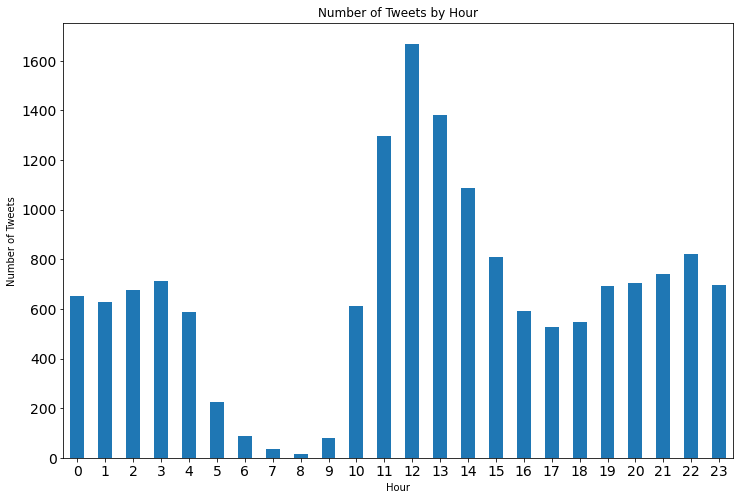

In [ ]:
title = 'Number of Tweets by Hour'
df.tweet.groupby(df.datetime.dt.hour).count().plot(figsize=(12,8), fontsize=14, kind='bar', rot=0, title=title)
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Number of Tweets')

([<matplotlib.axis.XTick at 0x7f230f3dd710>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

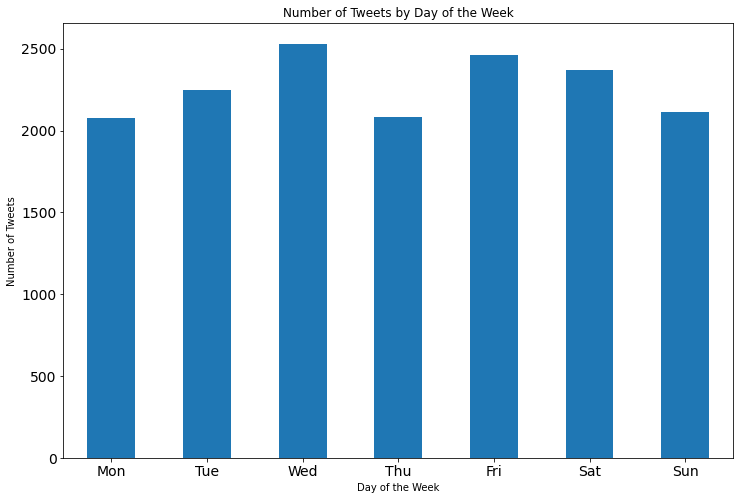

In [ ]:
title = 'Number of Tweets by Day of the Week'
df.tweet.groupby(df.datetime.dt.dayofweek).count().plot(figsize=(12,8), fontsize=14, kind='bar', rot=0, title=title)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.xticks(np.arange(7),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [ ]:
import re
pattern = re.compile('(?<=RT @).*?(?=:)')
df_retweets['original'] = [re.search(pattern, tweet).group(0) for tweet in df_retweets.tweet]

In [ ]:
df_originals = df_retweets.groupby(['original']).sum().sort_values('retweets').reset_index().sort_values('retweets', ascending=False)

In [ ]:
df_originals.head()
df_originals.shape

original  retweets  favorites
490  realDonaldTrump  6075781   0        
489  WhiteHouse       1237438   0        
488  Jim_Jordan       772172    0        
487  FLOTUS           575995    0        
486  Scavino45        511557    0

(491, 3)

Text(0.5, 0, "Originating Tweet's Username")

([], <a list of 0 Text major ticklabel objects>)

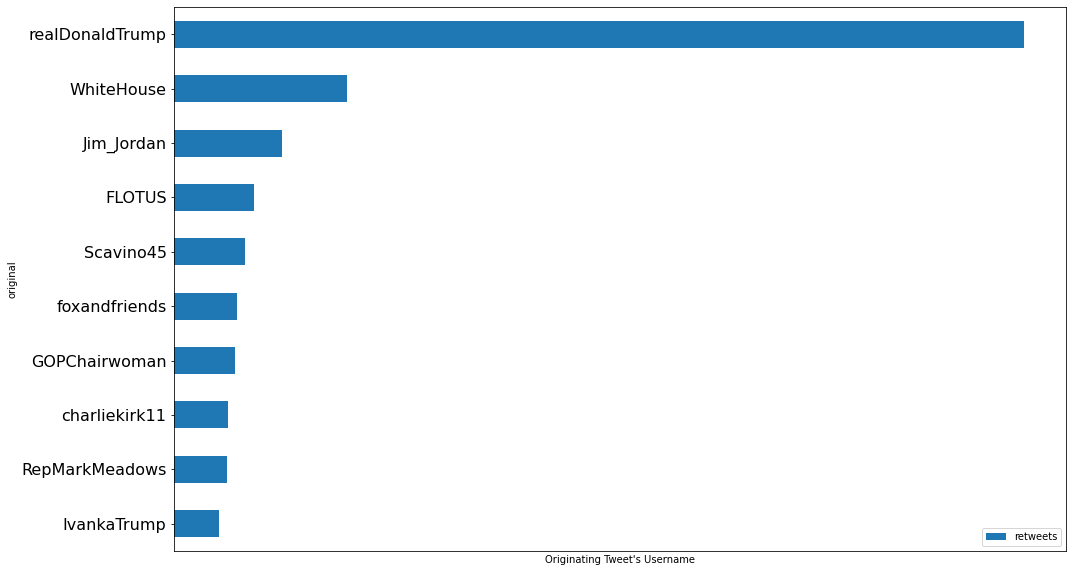

In [ ]:
df_originals = df_retweets.groupby(['original']).sum().sort_values('retweets').reset_index().sort_values('retweets', ascending=False)[:10].sort_values('retweets')




df_originals.plot.barh(x='original', y='retweets', figsize=(16,10), fontsize=16)
plt.xlabel("Originating Tweet's Username")
plt.xticks([])

In [ ]:
math.sqrt(math.sqrt(12))

1.8612097182041991

In [ ]:
df_retweets.loc[df_retweets.original == 'realDonaldTrump'].sort_values('retweets', ascending=False)[:5]

tweet  \
5522   RT @realDonaldTrump: https://t.co/11nzKwOCtU                                                                                                   
4956   RT @realDonaldTrump: https://t.co/DutxclyZw9                                                                                                   
14559  RT @realDonaldTrump: They just didn't get it but they do now! https://t.co/9T50NupkDy                                                          
472    RT @realDonaldTrump: I am proud to announce that the United States will donate ventilators to our friends in India. We stand with India and…   
14763  RT @realDonaldTrump: Don’t worry the Republicans and your President will fix it! https://t.co/xsbuPzXbHj                                       

       retweets  favorites            datetime         original  
5522   201682    0         2019-12-09 04:59:41  realDonaldTrump  
4956   123202    0         2019-12-20 11:28:32  realDonaldTrump  
14559  108867    0         2018-07-10 11:38:10  realDonaldTrump  
472    79957     0         2020-05-16 13:17:11  realDonaldTrump  
14763  72746     0         2018-06-22 02:12:34  realDonaldTrump

In [ ]:
df_retweets.loc[df_retweets.original == 'charliekirk11'].sort_values('retweets', ascending=False)[:5]

tweet  \
301    RT @charliekirk11: RT if President Trump should withhold federal funds to states that try to STEAL our elections with voter fraud!             
4811   RT @charliekirk11: This is your daily reminder that:Barack Obama asked Ukraine to investigate his political rival's campaign manager3 D…       
1440   RT @charliekirk11: This is your daily reminder that Joe Biden flew his son to China on Air Force 2 to help him secure a $1.5 BILLION deal w…   
1443   RT @charliekirk11: Did you know:Ilhan Omar's campaign is on track to pay her husband's consulting firm $1.16 MILLION in 2020Last year…         
12783  RT @charliekirk11: There are riots in socialist France because of radical leftist fuel taxesMedia barely mentioning thisAmerica is boom…       

       retweets  favorites            datetime       original  
301    36903     0         2020-05-21 04:56:01  charliekirk11  
4811   36885     0         2019-12-27 13:07:42  charliekirk11  
1440   33067     0         2020-04-18 03:45:29  charliekirk11  
1443   32540     0         2020-04-18 03:43:53  charliekirk11  
12783  30691     0         2018-12-04 16:24:07  charliekirk11

In [ ]:
import unicodedata
import nltk
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['rt']

In [ ]:
def clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

def get_words(df, column):
    """
    Takes in a dataframe and columns and returns a list of
    words from the values in the specified column.
    """
    return clean(''.join(str(df[column].tolist())))

def get_bigrams(df, column = 'retweets'):
    """
    Takes in a list of words and returns a series of
    bigrams with value counts.
    """
    return (pd.Series(nltk.ngrams(get_words(df, column), 2)).value_counts())[:10]

def get_trigrams(df, column):
    """
    Takes in a list of words and returns a series of
    trigrams with value counts.
    """
    return (pd.Series(nltk.ngrams(get_words(df, column), 3)).value_counts())[:10]

def viz_bigrams(df ,column):
    get_bigrams(df, column).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title('20 Most Frequently Occuring Bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

def viz_trigrams(df, column):
    get_trigrams(df, column).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title('20 Most Frequently Occuring Trigrams')
    plt.ylabel('Trigram')
    plt.xlabel('# Occurances')

In [ ]:
get_bigrams(df,'tweet')

(fake, news)                    712
(united, state)                 482
(witch, hunt)                   351
(president, trump)              323
(white, house)                  283
(president, realdonaldtrump)    245
(america, great)                228
(new, york)                     220
(news, medium)                  204
(great, job)                    202
dtype: int64

In [ ]:
get_bigrams(df)

(19070, 19967)    2
(18031, 11186)    2
(18569, 37403)    2
(11186, 14057)    2
(20211, 20679)    2
(16812, 18491)    2
(47587, 43752)    2
(33510, 23421)    2
(26157, 17886)    2
(19967, 19631)    2
dtype: int64

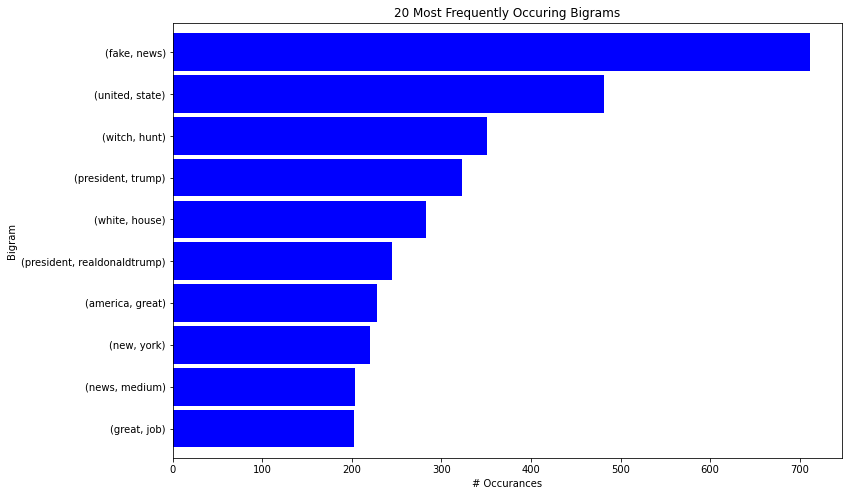

In [ ]:
viz_bigrams(df, 'tweet')

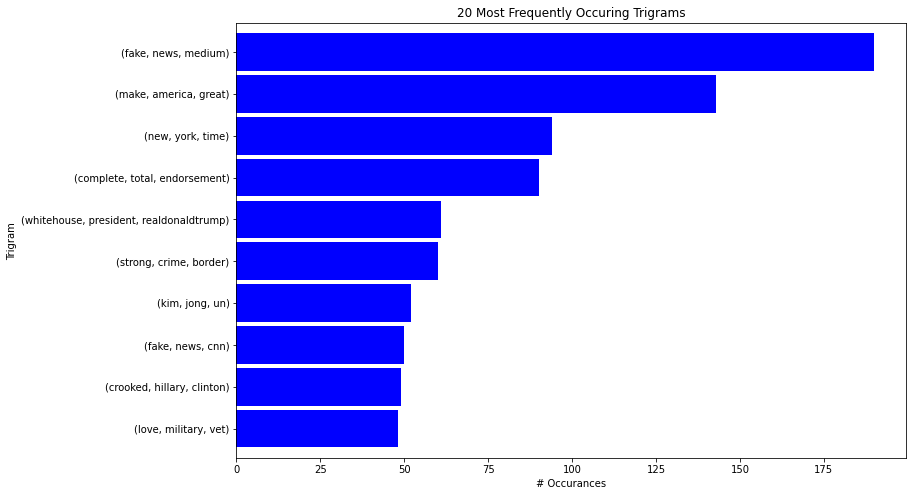

In [ ]:
viz_trigrams(df, 'tweet')

In [ ]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [ ]:
url = 'https://raw.githubusercontent.com/ArashVafa/ISTM660/master/Uber_Ride_Reviews.csv'

# Load data into a pandas dataframe
df = pd.read_csv(url)
df.head()

ride_review  \
0  I completed running New York Marathon requested Uber Pool ride back hotel First let tell started right The driver agreed pick drop locations via app I called spoke driver let know pick location actually blocked due marathon agreed another pickup location block away race road block Before I picked I got notification another rider joining part ride I picked driver spoken agreed upon location shortly passenger picked dropped Now went wrong Moments continuing destination I got notification via app phone ride asked driver going claimed Gee I I another passenger pick ride need get Still confused I asked still far agreed upon destination This time clearly played dumb saying understand Uber app works I get In middle street strange location even anywhere wanting argue clear new ride request another clearly lucrative wanting continue ride jerk I peacefully exited car I stood front private residence shivering cold degree rainy weather dark completed running mile marathon wanting nothing safe ride back hotel seek much needed rest warmth safety No sooner I exited car driver already scrawling new fare name piece paper standing outside car street meet new fare even inkling conscientiousness done And driver still nerve charge partial fare Not excited using Uber app street taxis coming another apps installed Lyft I requested new ride I connected shortly another driver minutes away minutes long amount time warm safe dressed running clothes weary expecting safe warm car I stranded street pace alone wait driver Also main street traffic heavy due marathon rode closures minute wait able get realistic To eternal happiness arrived within minutes delivered safely nicely next day finding way file complaint Uber via app I sent complaint within couple hours replied wet blanket apology inconvenience offered credit I charged To make even worse Uber credited towards another driver one taken day I wrote back corrected harm previous day good driver reputation take well earned pay preserve good relationships good Uber drivers I rode wrote back full credit better certainly enough make dangerous situation driver put mention discipline driver I told Uber I never use use Lyft Although many many Uber experiences past years I one bad apple ruined Uber forever   
1  My appointment time auto repairs required early available mechanic begin work The Uber app easily installed mobile device followed required information filled onto blanks When typing phone number gave order check SMS texts confirmation code used along number No text sent first try More tries texts give Four hours later texts codes sent Two attempts unsuccessful emailing Uber headquarters San Francisco included lively suggestions As follows I suggest someone unclog ride summoning impacted website rectum swallowing online laxative followed readily available Fleets enema must wait weeks repairs done shop That means safety concerns drive When using Uber months past things went far better problem cleared pronto apologetic courteous driver What letdown go round If world greatest ability dependability public service companies aware learning important aspect business world This incident second kind problem still fix Then unlike I made contact home base treated rudely great disrespect Perhaps reply better forthcoming I least choice codes might need one request service hours ahead needed Uber folks oughta uncrimp contained app Google store                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

rule based processing

In [ ]:
df2 = df[['ride_review', 'ride_rating']] 
df = df2
df.head()

ride_review  \
0  I completed running New York Marathon requested Uber Pool ride back hotel First let tell started right The driver agreed pick drop locations via app I called spoke driver let know pick location actually blocked due marathon agreed another pickup location block away race road block Before I picked I got notification another rider joining part ride I picked driver spoken agreed upon location shortly passenger picked dropped Now went wrong Moments continuing destination I got notification via app phone ride asked driver going claimed Gee I I another passenger pick ride need get Still confused I asked still far agreed upon destination This time clearly played dumb saying understand Uber app works I get In middle street strange location even anywhere wanting argue clear new ride request another clearly lucrative wanting continue ride jerk I peacefully exited car I stood front private residence shivering cold degree rainy weather dark completed running mile marathon wanting nothing safe ride back hotel seek much needed rest warmth safety No sooner I exited car driver already scrawling new fare name piece paper standing outside car street meet new fare even inkling conscientiousness done And driver still nerve charge partial fare Not excited using Uber app street taxis coming another apps installed Lyft I requested new ride I connected shortly another driver minutes away minutes long amount time warm safe dressed running clothes weary expecting safe warm car I stranded street pace alone wait driver Also main street traffic heavy due marathon rode closures minute wait able get realistic To eternal happiness arrived within minutes delivered safely nicely next day finding way file complaint Uber via app I sent complaint within couple hours replied wet blanket apology inconvenience offered credit I charged To make even worse Uber credited towards another driver one taken day I wrote back corrected harm previous day good driver reputation take well earned pay preserve good relationships good Uber drivers I rode wrote back full credit better certainly enough make dangerous situation driver put mention discipline driver I told Uber I never use use Lyft Although many many Uber experiences past years I one bad apple ruined Uber forever   
1  My appointment time auto repairs required early available mechanic begin work The Uber app easily installed mobile device followed required information filled onto blanks When typing phone number gave order check SMS texts confirmation code used along number No text sent first try More tries texts give Four hours later texts codes sent Two attempts unsuccessful emailing Uber headquarters San Francisco included lively suggestions As follows I suggest someone unclog ride summoning impacted website rectum swallowing online laxative followed readily available Fleets enema must wait weeks repairs done shop That means safety concerns drive When using Uber months past things went far better problem cleared pronto apologetic courteous driver What letdown go round If world greatest ability dependability public service companies aware learning important aspect business world This incident second kind problem still fix Then unlike I made contact home base treated rudely great disrespect Perhaps reply better forthcoming I least choice codes might need one request service hours ahead needed Uber folks oughta uncrimp contained app Google store                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Rating Distribution')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Review Quantity')

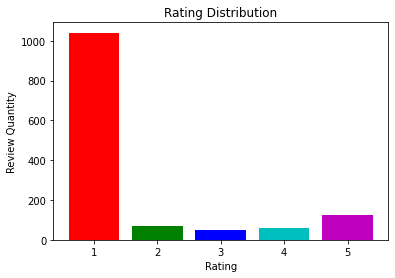

In [ ]:

#seperating by groups
groups = df.groupby('ride_rating').count()
Values = groups.ride_review
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

I am good --> positive sentiment


I am bad --> negative sentiment

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Rating Distribution')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Review Quantity')

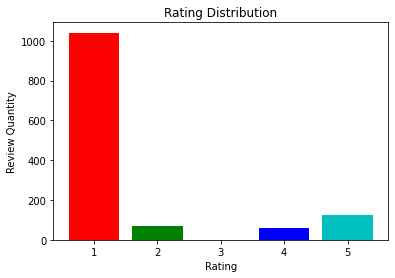

In [ ]:
df = df[df.ride_rating != 3]
#separating by groups
groups = df.groupby('ride_rating').count()
Values = groups.ride_review
colors = ['r', 'g', 'b', 'c']
#making bar plot
plt.bar(([1,2,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

we can undersample


we can oversample


we can also create data --> synthetic datasets 

In [ ]:
df['binary_class'] = np.where(df['ride_rating'] > 3, 1, 0)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ride_review  \
0     I completed running New York Marathon requested Uber Pool ride back hotel First let tell started right The driver agreed pick drop locations via app I called spoke driver let know pick location actually blocked due marathon agreed another pickup location block away race road block Before I picked I got notification another rider joining part ride I picked driver spoken agreed upon location shortly passenger picked dropped Now went wrong Moments continuing destination I got notification via app phone ride asked driver going claimed Gee I I another passenger pick ride need get Still confused I asked still far agreed upon destination This time clearly played dumb saying understand Uber app works I get In middle street strange location even anywhere wanting argue clear new ride request another clearly lucrative wanting continue ride jerk I peacefully exited car I stood front private residence shivering cold degree rainy weather dark completed running mile marathon wanting nothing safe ride back hotel seek much needed rest warmth safety No sooner I exited car driver already scrawling new fare name piece paper standing outside car street meet new fare even inkling conscientiousness done And driver still nerve charge partial fare Not excited using Uber app street taxis coming another apps installed Lyft I requested new ride I connected shortly another driver minutes away minutes long amount time warm safe dressed running clothes weary expecting safe warm car I stranded street pace alone wait driver Also main street traffic heavy due marathon rode closures minute wait able get realistic To eternal happiness arrived within minutes delivered safely nicely next day finding way file complaint Uber via app I sent complaint within couple hours replied wet blanket apology inconvenience offered credit I charged To make even worse Uber credited towards another driver one taken day I wrote back corrected harm previous day good driver reputation take well earned pay preserve good relationships good Uber drivers I rode wrote back full credit better certainly enough make dangerous situation driver put mention discipline driver I told Uber I never use use Lyft Although many many Uber experiences past years I one bad apple ruined Uber forever                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['ride_review'], df['binary_class'], random_state = 0)
#setting random number between 1 and 1000
number = random.randint(1,1000)
#printing random training text and X_train shape
print ('Random Review:')
print(' ')
print(X_train[number])
print(' ')
print('X_train shape: ' + str(X_train.shape))

Random Review:
 
Uber like dream come true yes nice comfortable ride picks right house need go main road catch taxi thumbs uber
 
X_train shape: (970,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#creating variable which assigns X_train to numbers
vect = CountVectorizer().fit(X_train)
#translates numbers back to text
vect.get_feature_names()[1:10]

['abandoned',
 'ability',
 'able',
 'about',
 'abrupt',
 'absence',
 'absolute',
 'absolutely',
 'absorb']

In [ ]:
X_train_vectorized = vect.transform(X_train)
print (X_train_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
feature_names = np.array(vect.get_feature_names())
#creating array of all the regression coefficients per word
coef_index = model.coef_[0]
#creating df with both arrays in it
df = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})
#sorting by coefficient
df.sort_values('Coef')


In [ ]:
print(model.predict(vect.transform(['great'])))
print(model.predict(vect.transform(['Who doesn’t love a clean car? If your driver takes great care of theirs, go ahead and say thanks.'])))
print(model.predict(vect.transform(['great she the best'])))

[1]
[1]
[1]


In [ ]:
print(model.predict(vect.transform(['hard, bad'])))

[0]
